### Student Information
Name: 孫睿菡

Student ID:109062469

GitHub ID:50405634

### Instructions

1. First: do the **take home** exercises in the [DM2021-Lab1-master Repo](https://github.com/fhcalderon87/DM2021-Lab1-master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2021-Lab1-master Repo](https://github.com/fhcalderon87/DM2021-Lab1-master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fhcalderon87/DM2021-Lab1-master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 4th 11:59 pm, Thursday)__. 

## Data Preparation and transformation

In [1]:
import os
import pandas as pd
import helpers.data_mining_helpers as dmh

In [2]:
dir_path = r'/Users/sunruihan/Desktop/DMLab1/sentiment labelled sentences'

In [3]:
X = []
for filename in os.listdir(dir_path):
    if filename.endswith('.txt') and filename != 'readme.txt':
        print(filename)
        full_path = os.path.join(dir_path, filename)
        txt_data = pd.read_table(full_path, header=None)
        txt_data.columns = ['sentence', 'score']
        txt_data['filename'] = filename[:-4] # add filename to the dataframe
        X.append(txt_data)

amazon_cells_labelled.txt
yelp_labelled.txt
imdb_labelled.txt


In [4]:
X = pd.concat(X) #concat 3 txts

In [5]:
X.head()

,sentence,score,filename
0,So there is no way for me to plug it in here i...,0,amazon_cells_labelled
1,"Good case, Excellent value.",1,amazon_cells_labelled
2,Great for the jawbone.,1,amazon_cells_labelled
3,Tied to charger for conversations lasting more...,0,amazon_cells_labelled
4,The mic is great.,1,amazon_cells_labelled


In [6]:
X.tail()

,sentence,score,filename
743,I just got bored watching Jessice Lange take h...,0,imdb_labelled
744,"Unfortunately, any virtue in this film's produ...",0,imdb_labelled
745,"In a word, it is embarrassing.",0,imdb_labelled
746,Exceptionally bad!,0,imdb_labelled
747,All in all its an insult to one's intelligence...,0,imdb_labelled


In [7]:
X[0:10]

,sentence,score,filename
0,So there is no way for me to plug it in here i...,0,amazon_cells_labelled
1,"Good case, Excellent value.",1,amazon_cells_labelled
2,Great for the jawbone.,1,amazon_cells_labelled
3,Tied to charger for conversations lasting more...,0,amazon_cells_labelled
4,The mic is great.,1,amazon_cells_labelled
5,I have to jiggle the plug to get it to line up...,0,amazon_cells_labelled
6,If you have several dozen or several hundred c...,0,amazon_cells_labelled
7,If you are Razr owner...you must have this!,1,amazon_cells_labelled
8,"Needless to say, I wasted my money.",0,amazon_cells_labelled
9,What a waste of money and time!.,0,amazon_cells_labelled


In [8]:
# a simple query
X[0:10][["sentence", "filename"]]

,sentence,filename
0,So there is no way for me to plug it in here i...,amazon_cells_labelled
1,"Good case, Excellent value.",amazon_cells_labelled
2,Great for the jawbone.,amazon_cells_labelled
3,Tied to charger for conversations lasting more...,amazon_cells_labelled
4,The mic is great.,amazon_cells_labelled
5,I have to jiggle the plug to get it to line up...,amazon_cells_labelled
6,If you have several dozen or several hundred c...,amazon_cells_labelled
7,If you are Razr owner...you must have this!,amazon_cells_labelled
8,"Needless to say, I wasted my money.",amazon_cells_labelled
9,What a waste of money and time!.,amazon_cells_labelled


In [9]:
X[-10:] #query the last 10 records

,sentence,score,filename
738,"The opening sequence of this gem is a classic,...",1,imdb_labelled
739,Fans of the genre will be in heaven.,1,imdb_labelled
740,Lange had become a great actress.,1,imdb_labelled
741,It looked like a wonderful story.,1,imdb_labelled
742,I never walked out of a movie faster.,0,imdb_labelled
743,I just got bored watching Jessice Lange take h...,0,imdb_labelled
744,"Unfortunately, any virtue in this film's produ...",0,imdb_labelled
745,"In a word, it is embarrassing.",0,imdb_labelled
746,Exceptionally bad!,0,imdb_labelled
747,All in all its an insult to one's intelligence...,0,imdb_labelled


In [10]:
# using loc (by position)
X.iloc[::10, 0:2][0:10]

,sentence,score
0,So there is no way for me to plug it in here i...,0
10,And the sound quality is great.,1
20,I went on Motorola's website and followed all ...,0
30,"This is a simple little phone to use, but the ...",0
40,"It has a great camera thats 2MP, and the pics ...",1
50,Not loud enough and doesn't turn on like it sh...,0
60,Essentially you can forget Microsoft's tech su...,0
70,Mic Doesn't work.,0
80,I wear it everyday and it holds up very well.,1
90,For a product that costs as much as this one d...,0


In [11]:
# using loc (by label)
X.loc[::10, 'sentence'][0:10]

0     So there is no way for me to plug it in here i...
10                      And the sound quality is great.
20    I went on Motorola's website and followed all ...
30    This is a simple little phone to use, but the ...
40    It has a great camera thats 2MP, and the pics ...
50    Not loud enough and doesn't turn on like it sh...
60    Essentially you can forget Microsoft's tech su...
70                                    Mic Doesn't work.
80        I wear it everyday and it holds up very well.
90    For a product that costs as much as this one d...
Name: sentence, dtype: object

In [12]:
# standard query (Cannot simultaneously select rows and columns)
X[::10][0:10]

,sentence,score,filename
0,So there is no way for me to plug it in here i...,0,amazon_cells_labelled
10,And the sound quality is great.,1,amazon_cells_labelled
20,I went on Motorola's website and followed all ...,0,amazon_cells_labelled
30,"This is a simple little phone to use, but the ...",0,amazon_cells_labelled
40,"It has a great camera thats 2MP, and the pics ...",1,amazon_cells_labelled
50,Not loud enough and doesn't turn on like it sh...,0,amazon_cells_labelled
60,Essentially you can forget Microsoft's tech su...,0,amazon_cells_labelled
70,Mic Doesn't work.,0,amazon_cells_labelled
80,I wear it everyday and it holds up very well.,1,amazon_cells_labelled
90,For a product that costs as much as this one d...,0,amazon_cells_labelled


In [13]:
X[X['score']== 0]

,sentence,score,filename
0,So there is no way for me to plug it in here i...,0,amazon_cells_labelled
3,Tied to charger for conversations lasting more...,0,amazon_cells_labelled
5,I have to jiggle the plug to get it to line up...,0,amazon_cells_labelled
6,If you have several dozen or several hundred c...,0,amazon_cells_labelled
8,"Needless to say, I wasted my money.",0,amazon_cells_labelled
...,...,...,...
743,I just got bored watching Jessice Lange take h...,0,imdb_labelled
744,"Unfortunately, any virtue in this film's produ...",0,imdb_labelled
745,"In a word, it is embarrassing.",0,imdb_labelled
746,Exceptionally bad!,0,imdb_labelled


In [14]:
X.loc[lambda f: f.filename == 'amazon_cells_labelled.txt'].iloc[::10, :][0:5]

,sentence,score,filename


## Data Mining using Pandas

###  Missing Values

In [15]:
X.isnull()

,sentence,score,filename
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
743,False,False,False
744,False,False,False
745,False,False,False
746,False,False,False


In [16]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentence,score,filename
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


In [17]:
X.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0      (The amoung of missing records is: , 0)
1      (The amoung of missing records is: , 0)
2      (The amoung of missing records is: , 0)
3      (The amoung of missing records is: , 0)
4      (The amoung of missing records is: , 0)
                        ...                   
743    (The amoung of missing records is: , 0)
744    (The amoung of missing records is: , 0)
745    (The amoung of missing records is: , 0)
746    (The amoung of missing records is: , 0)
747    (The amoung of missing records is: , 0)
Length: 2748, dtype: object

In [18]:
dummy_series = pd.Series(["dummy_record", 1], index=["sentence", "score"])

In [19]:
dummy_series

sentence    dummy_record
score                  1
dtype: object

In [20]:
result_with_series = X.append(dummy_series, ignore_index=True)

In [21]:
len(result_with_series)

2749

In [22]:
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentence,score,filename
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,1


In [23]:
# dummy record as dictionary format
dummy_dict = [{'sentence': 'dummy_record',
               'score': 1
              }]

In [24]:
X = X.append(dummy_dict, ignore_index=True)

In [25]:
len(X)

2749

In [26]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentence,score,filename
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,1


In [27]:
X.dropna(inplace=True)

In [28]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentence,score,filename
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


In [29]:
len(X)

2748

###  Dealing with Duplicate Data

In [30]:
X.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2743    False
2744    False
2745    False
2746    False
2747    False
Length: 2748, dtype: bool

In [31]:
sum(X.duplicated())

17

In [32]:
sum(X.duplicated('sentence'))

17

In [33]:
dummy_duplicate_dict = [{
                             'sentence': 'dummy record',
                             'score': 1, 
                             'filename': "dummy category"
                        },
                        {
                             'sentence': 'dummy record',
                             'score': 1, 
                             'filename': "dummy category"
                        }]

In [34]:
X = X.append(dummy_duplicate_dict, ignore_index=True)

In [35]:
len(X)

2750

In [36]:
sum(X.duplicated('sentence'))

18

In [37]:
X.drop_duplicates(keep=False, inplace=True) # inplace applies changes directly on our dataframe

In [38]:
len(X)

2714

### Sampling

In [39]:
X_sample = X.sample(n=1000) #random state

In [40]:
len(X_sample)

1000

In [41]:
X_sample[0:4]

,sentence,score,filename
546,Worst software ever used.... If I could give t...,0,amazon_cells_labelled
173,The iGo chargers and tips are really great.,1,amazon_cells_labelled
2048,But in terms of the writing it's very fresh an...,1,imdb_labelled
1381,They have great dinners.,1,yelp_labelled


In [42]:
#pick 5 sentences category
#Rows with larger value in the label column are more likely to be sampled.
X_sample1 = X.sample(n=5, weights='score') 

In [43]:
X_sample1

,sentence,score,filename
1312,The food was very good.,1,yelp_labelled
317,This is definitely a must have if your state d...,1,amazon_cells_labelled
51,good protection and does not make phone too bu...,1,amazon_cells_labelled
1725,Great food and awesome service!,1,yelp_labelled
105,"Pros:-Good camera - very nice pictures , also ...",1,amazon_cells_labelled


In [44]:
import matplotlib.pyplot as plt
%matplotlib inline

yelp_labelled            992
amazon_cells_labelled    980
imdb_labelled            742
Name: filename, dtype: int64


<AxesSubplot:title={'center':'filename distribution'}>

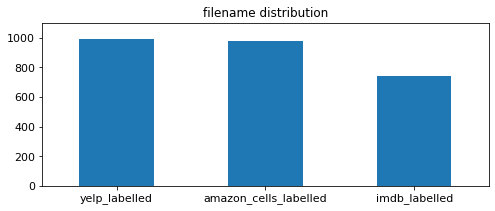

In [45]:
print(X.filename.value_counts())

# plot barchart for X_sample
X.filename.value_counts().plot(kind = 'bar',
                                    title = 'filename distribution',
                                    ylim = [0, 1100],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

amazon_cells_labelled    378
yelp_labelled            348
imdb_labelled            274
Name: filename, dtype: int64


<AxesSubplot:title={'center':'filename distribution'}>

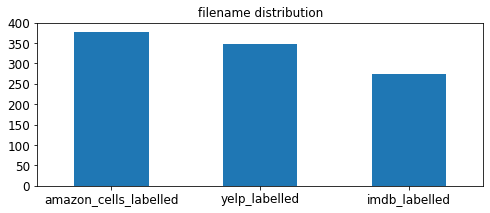

In [46]:
print(X_sample.filename.value_counts())

# plot barchart for X_sample
X_sample.filename.value_counts().plot(kind = 'bar',
                                           title = 'filename distribution',
                                           ylim = [0, 400], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

amazon_cells_labelled    378
yelp_labelled            348
imdb_labelled            274
Name: filename, dtype: int64


<AxesSubplot:title={'center':'filename distribution'}>

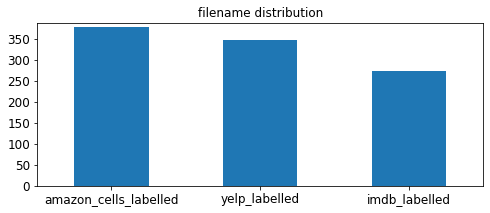

In [47]:
upper_bound = max(X_sample.filename.value_counts()) + 10

print(X_sample.filename.value_counts())

# plot barchart for X_sample
X_sample.filename.value_counts().plot(kind = 'bar',
                                           title = 'filename distribution',
                                           ylim = [0, upper_bound], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

yelp_labelled            992
amazon_cells_labelled    980
imdb_labelled            742
Name: filename, dtype: int64


amazon_cells_labelled    378
yelp_labelled            348
imdb_labelled            274
Name: filename, dtype: int64


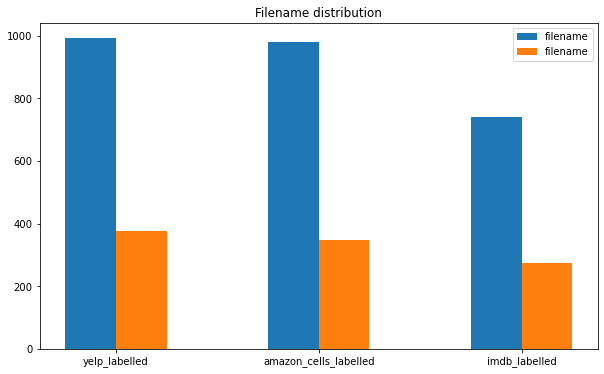

In [48]:
import numpy as np
print(X.filename.value_counts())
print('\n')
print(X_sample.filename.value_counts())

labels = ['yelp_labelled','amazon_cells_labelled','imdb_labelled']
width = 0.25
x = np.arange(len(labels))

plt.figure(figsize=(10,6))
plt.title('Filename distribution',fontsize=12)
plt.bar(x-width/2, X.filename.value_counts(), width=width, label='filename')
plt.bar(x+width/2, X_sample.filename.value_counts(), width=width, label='filename')
plt.legend()
plt.xticks(x,labels)
plt.show()

### Feature Creation

In [49]:
import nltk

In [50]:
# takes a like a minute or two to process
X['unigrams'] = X['sentence'].apply(lambda x: dmh.tokenize_text(x))

In [51]:
X[0:4]["unigrams"]

0    [So, there, is, no, way, for, me, to, plug, it...
1                 [Good, case, ,, Excellent, value, .]
2                        [Great, for, the, jawbone, .]
3    [Tied, to, charger, for, conversations, lastin...
Name: unigrams, dtype: object

In [52]:
X[0:4]

,sentence,score,filename,unigrams
0,So there is no way for me to plug it in here i...,0,amazon_cells_labelled,"[So, there, is, no, way, for, me, to, plug, it..."
1,"Good case, Excellent value.",1,amazon_cells_labelled,"[Good, case, ,, Excellent, value, .]"
2,Great for the jawbone.,1,amazon_cells_labelled,"[Great, for, the, jawbone, .]"
3,Tied to charger for conversations lasting more...,0,amazon_cells_labelled,"[Tied, to, charger, for, conversations, lastin..."


In [53]:
list(X[0:1]['unigrams'])

[['So',
  'there',
  'is',
  'no',
  'way',
  'for',
  'me',
  'to',
  'plug',
  'it',
  'in',
  'here',
  'in',
  'the',
  'US',
  'unless',
  'I',
  'go',
  'by',
  'a',
  'converter',
  '.']]

### Feature subset selection

In [54]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.sentence)

In [55]:
analyze = count_vect.build_analyzer()
analyze("Hello World!")
#" ".join(list(X[4:5].text))

['hello', 'world']

In [56]:
analyze(" ".join(list(X[:1].sentence)))

['so',
 'there',
 'is',
 'no',
 'way',
 'for',
 'me',
 'to',
 'plug',
 'it',
 'in',
 'here',
 'in',
 'the',
 'us',
 'unless',
 'go',
 'by',
 'converter']

In [57]:
# We can check the shape of this matrix by:
X_counts.shape

(2714, 5153)

In [58]:
# We can obtain the feature names of the vectorizer, i.e., the terms
# usually on the horizontal axis
count_vect.get_feature_names()[0:10]

['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17']

In [59]:
X[0:5]

,sentence,score,filename,unigrams
0,So there is no way for me to plug it in here i...,0,amazon_cells_labelled,"[So, there, is, no, way, for, me, to, plug, it..."
1,"Good case, Excellent value.",1,amazon_cells_labelled,"[Good, case, ,, Excellent, value, .]"
2,Great for the jawbone.,1,amazon_cells_labelled,"[Great, for, the, jawbone, .]"
3,Tied to charger for conversations lasting more...,0,amazon_cells_labelled,"[Tied, to, charger, for, conversations, lastin..."
4,The mic is great.,1,amazon_cells_labelled,"[The, mic, is, great, .]"


In [60]:
# we convert from sparse array to normal array
X_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [61]:
# the fourth record 
a = X_counts[0:5, 0:100].toarray()
for i in range(1,100):
    if a[3][i] == 1:
        print(count_vect.get_feature_names()[i])

45


In [62]:
count_vect.transform(['Something completely new.']).toarray()

array([[0, 0, 0, ..., 0, 0, 0]])

In [63]:
count_vect.transform(['00 Something completely new.']).toarray()

array([[1, 0, 0, ..., 0, 0, 0]])

In [64]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:20]]

In [65]:
plot_x

['term_00',
 'term_10',
 'term_100',
 'term_11',
 'term_12',
 'term_13',
 'term_15',
 'term_15g',
 'term_15pm',
 'term_17',
 'term_18',
 'term_18th',
 'term_1928',
 'term_1947',
 'term_1948',
 'term_1949',
 'term_1971',
 'term_1973',
 'term_1979',
 'term_1980']

In [66]:
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]

In [67]:
plot_z = X_counts[0:20, 0:20].toarray()

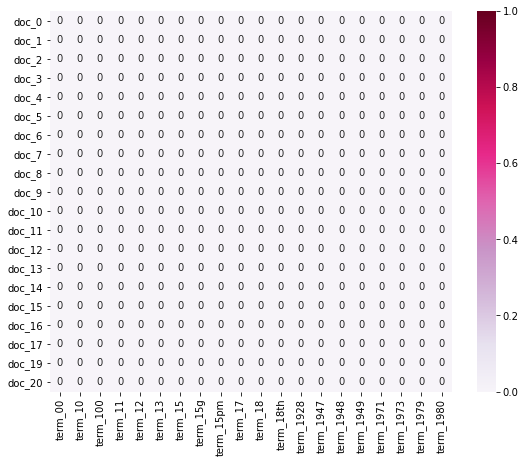

In [68]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

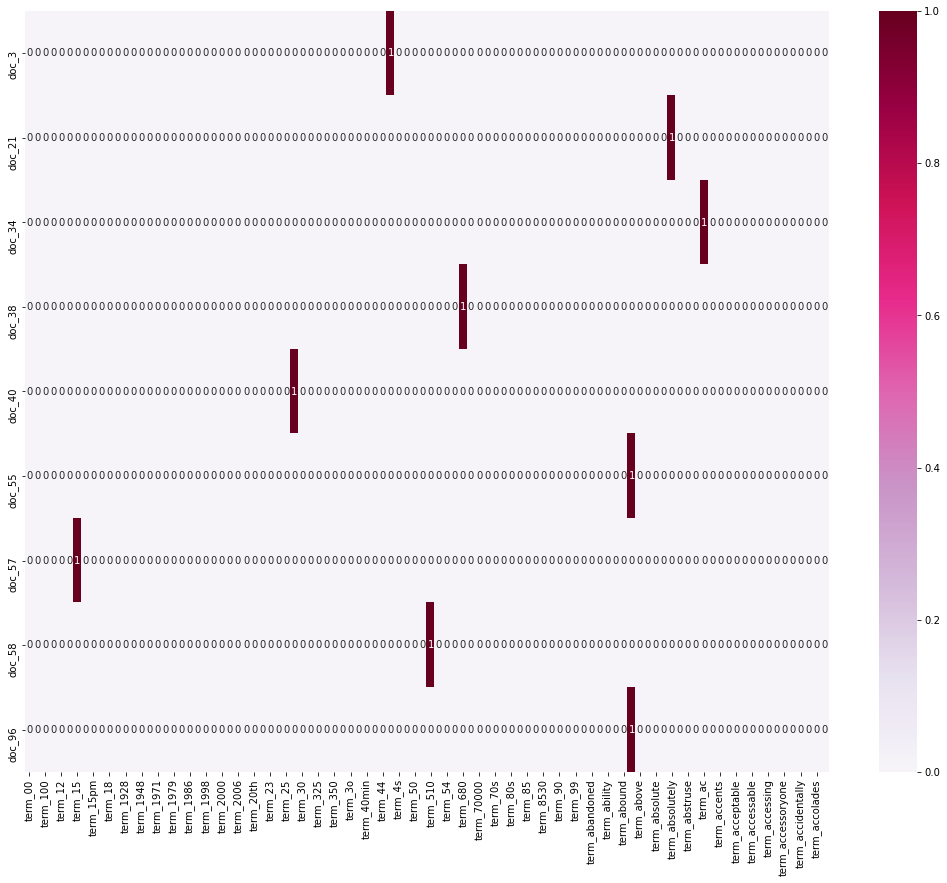

In [69]:
# Answer here  
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:100]]
plot_y = ["doc_"+ str(i) for i in (X.index)[0:100]]
plot_z = X_counts[0:100,0:100].toarray()
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(18, 14))
ax = sns.heatmap(df_todraw.loc[~(df_todraw == 0).all(axis=1),:], # throw df_todraw == 0
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)


### Dimensionality Reduction

In [70]:
from sklearn.decomposition import PCA

In [71]:
X_reduced = PCA(n_components = 2).fit_transform(X_counts.toarray())

In [72]:
X_reduced.shape

(2714, 2)

In [73]:
X_reduced

array([[ 0.72253878,  1.10530938],
       [-1.02862925,  0.02792685],
       [-0.28912074, -0.00936547],
       ...,
       [-0.52897017,  0.86203952],
       [-1.04810271, -0.06851126],
       [ 0.05751504, -0.27677079]])

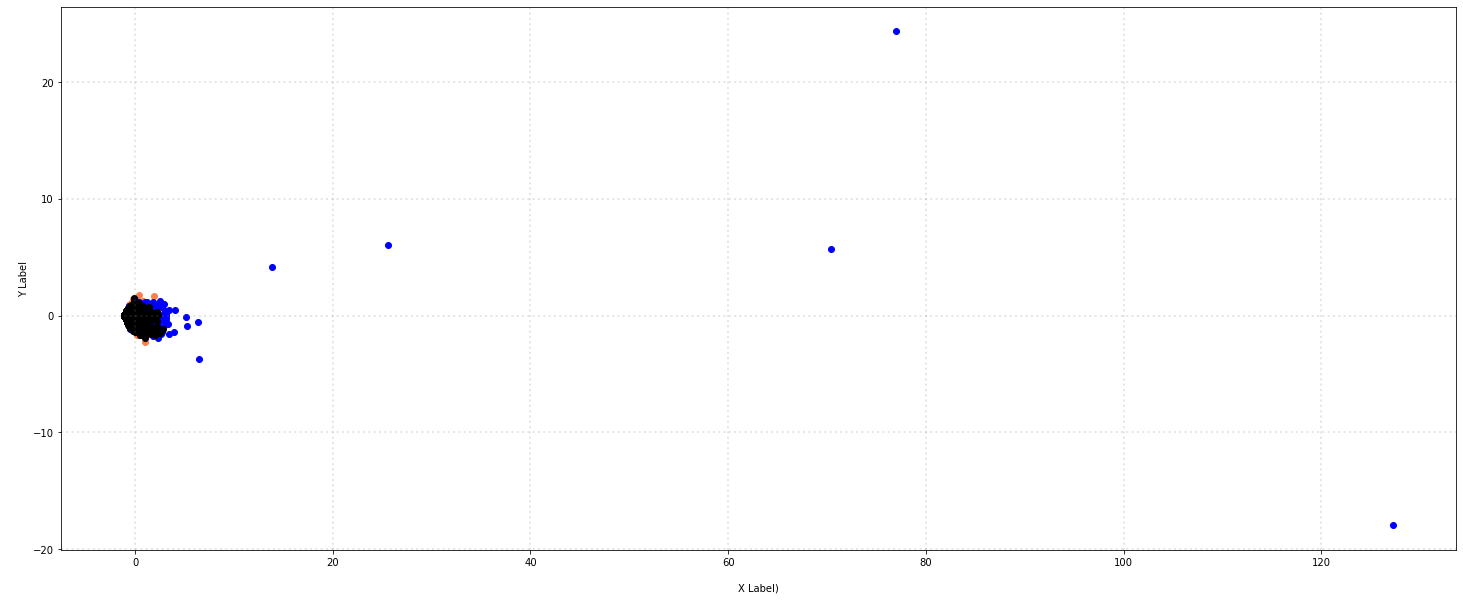

In [74]:
col = ['coral', 'blue', 'black']
filenames = ['amazon_cells_labelled','imdb_labelled','yelp_labelled']
# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, filename in zip(col, filenames):
    xs = X_reduced[X['filename'] == filename].T[0]
    ys = X_reduced[X['filename'] == filename].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label)')
ax.set_ylabel('\nY Label')

plt.show()

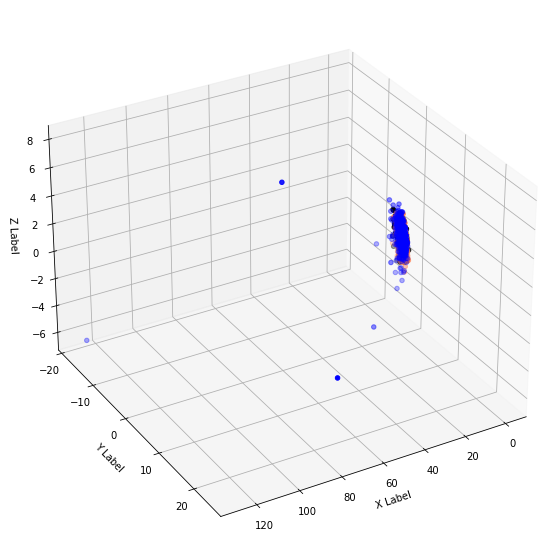

In [75]:
# Answer here
from mpl_toolkits.mplot3d import Axes3D

X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())

def plot_3D(elev,azim):
    fig = plt.figure(figsize = (25,10))
    ax = fig.add_subplot(111, projection='3d')
    for c,filename in zip(col, filenames):
        xs = X_reduced[X['filename'] == filename].T[0]
        ys = X_reduced[X['filename'] == filename].T[1]
        zs = X_reduced[X['filename'] == filename].T[2]
        ax.scatter(xs,ys,zs,c = c,marker='o')
        ax.view_init(elev=elev,azim=azim)
        
    ax.set_zlabel('Z Label')  # 坐标轴
    ax.set_ylabel('Y Label')
    ax.set_xlabel('X Label')
plot_3D(elev=30, azim=60)

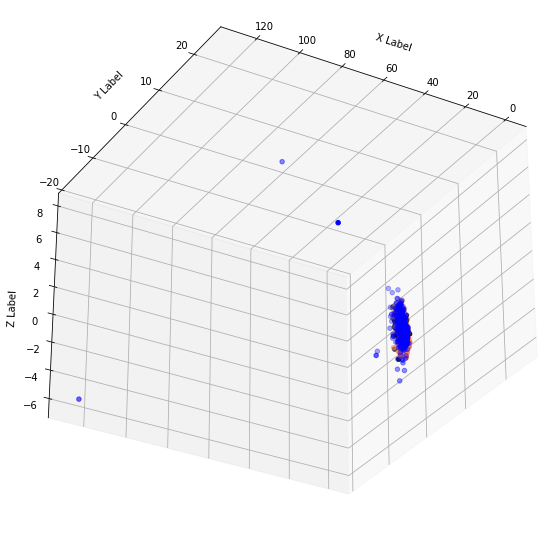

In [76]:
plot_3D(elev=-30, azim=60) 

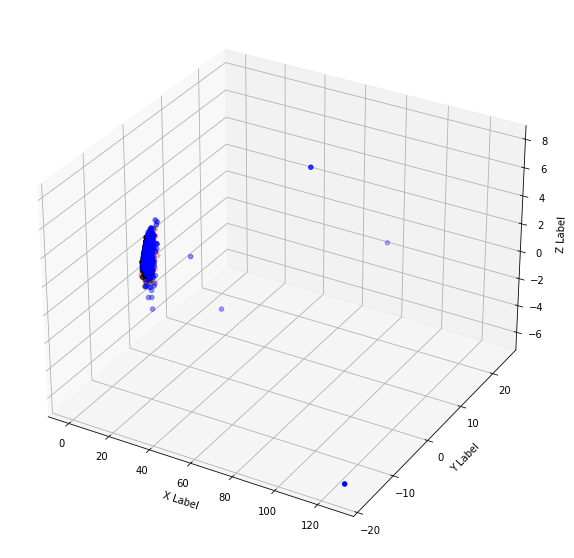

In [77]:
plot_3D(elev=30, azim=-60) 

### Atrribute Transformation / Aggregation

In [78]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

In [79]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [80]:
term_frequencies[0]

1

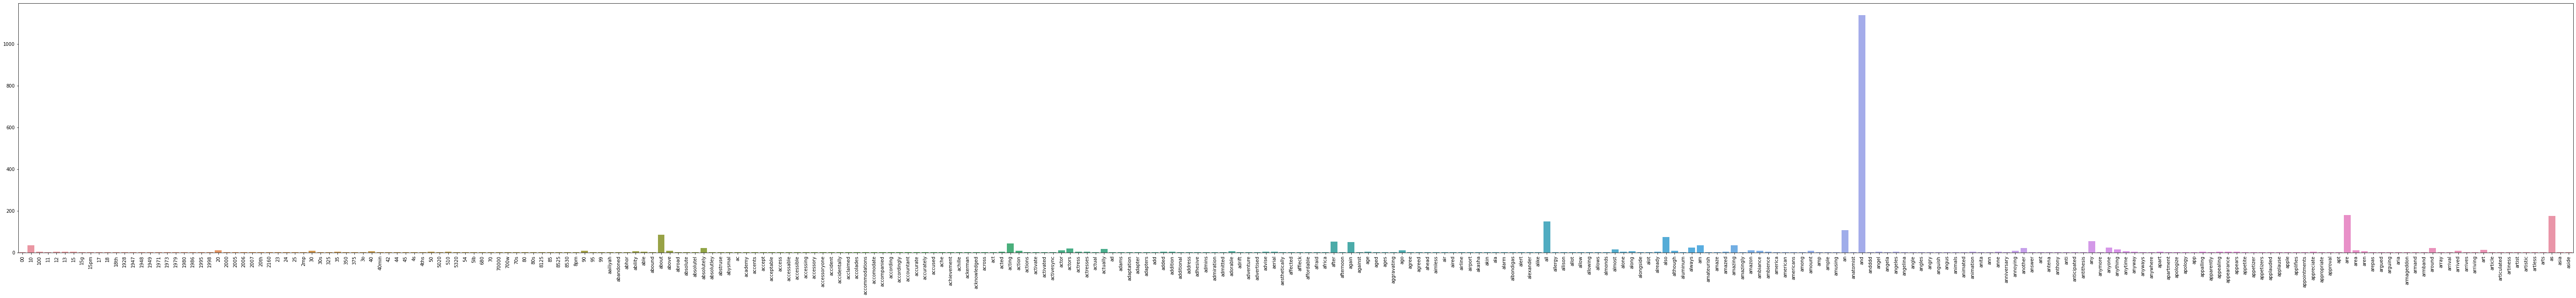

In [81]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

In [82]:
# Answer here

import plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
#for i in term_frequencies:
    
# Trace
trace_basic = [go.Bar(
            x = count_vect.get_feature_names()[:300],
            y = term_frequencies[:300],
        )]
# Layout
layout_basic = go.Layout(title='Term Frequencies')
# Figure    
figure_basic = go.Figure(data = trace_basic, layout = layout_basic)
# Plot
iplot(figure_basic)

In [83]:
d = dict(zip(count_vect.get_feature_names(),term_frequencies))
d1 = {k:v  for k, v in d.items() if v > 100}

In [84]:
# Answer here

key = []
value = []
for k,v in d1.items():
    key.append(k)
    value.append(v)
    trace_basic = [go.Bar(
                x = key,
                y = value
        )]
# Layout
layout_basic = go.Layout(title='Term Frequencies > 100')
# Figure    
figure_basic = go.Figure(data = trace_basic, layout = layout_basic)
# Plot
iplot(figure_basic)

In [85]:
# Answer here
d2 = sorted(d.items(), key = lambda x:x[1], reverse=True)
d2 = dict(d2[:300])
key = []
value = []
for k,v in d2.items():
    key.append(k)
    value.append(v)
    trace_basic = [go.Bar(
                x = key,
                y = value
        )]
# Layout
layout_basic = go.Layout(title='Term Frequencies in Top 300')
# Figure    
figure_basic = go.Figure(data = trace_basic, layout = layout_basic)
# Plot
iplot(figure_basic)

In [86]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

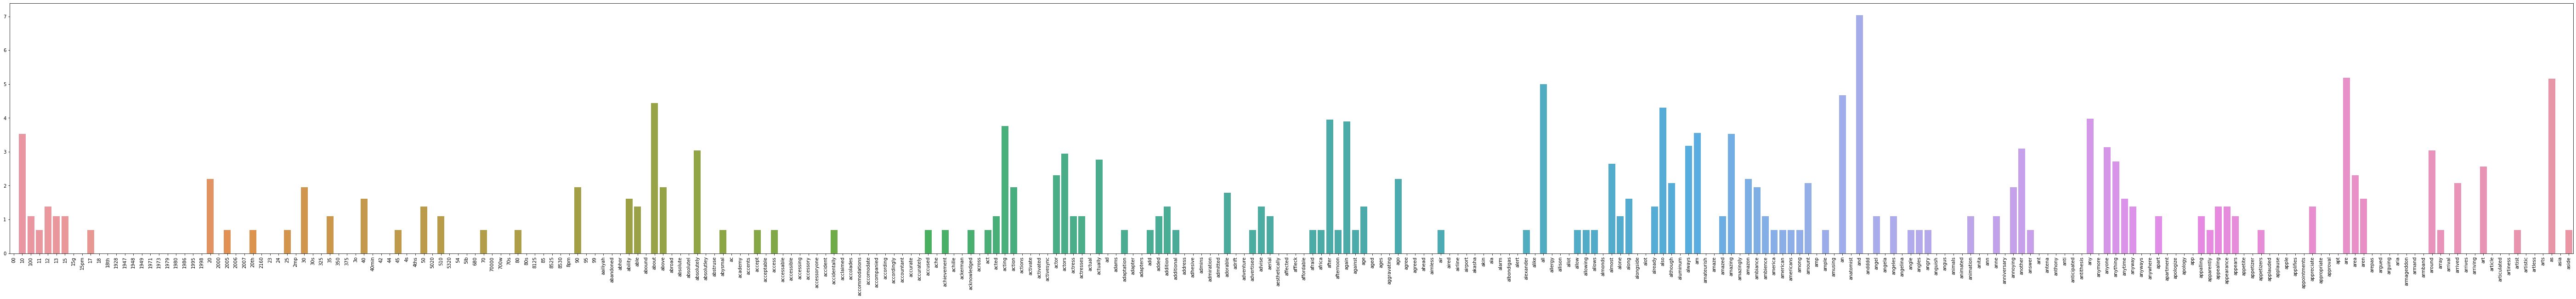

In [87]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

In [88]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [89]:
mlb = preprocessing.LabelBinarizer()

In [90]:
mlb.fit(X.score)

LabelBinarizer()

In [91]:
mlb.classes_

array([0, 1])

In [92]:
label = mlb.transform(X['score'])
X['bin_category'] = np.hstack((1 - label, label)).tolist()

In [93]:
X[0:9]

,sentence,score,filename,unigrams,bin_category
0,So there is no way for me to plug it in here i...,0,amazon_cells_labelled,"[So, there, is, no, way, for, me, to, plug, it...","[1, 0]"
1,"Good case, Excellent value.",1,amazon_cells_labelled,"[Good, case, ,, Excellent, value, .]","[0, 1]"
2,Great for the jawbone.,1,amazon_cells_labelled,"[Great, for, the, jawbone, .]","[0, 1]"
3,Tied to charger for conversations lasting more...,0,amazon_cells_labelled,"[Tied, to, charger, for, conversations, lastin...","[1, 0]"
4,The mic is great.,1,amazon_cells_labelled,"[The, mic, is, great, .]","[0, 1]"
5,I have to jiggle the plug to get it to line up...,0,amazon_cells_labelled,"[I, have, to, jiggle, the, plug, to, get, it, ...","[1, 0]"
6,If you have several dozen or several hundred c...,0,amazon_cells_labelled,"[If, you, have, several, dozen, or, several, h...","[1, 0]"
7,If you are Razr owner...you must have this!,1,amazon_cells_labelled,"[If, you, are, Razr, owner, ..., you, must, ha...","[0, 1]"
8,"Needless to say, I wasted my money.",0,amazon_cells_labelled,"[Needless, to, say, ,, I, wasted, my, money, .]","[1, 0]"


In [94]:
# Answer here
mlb.fit(X.filename)
X['bin_category'] = mlb.transform(X['filename']).tolist()
X[0:20]

,sentence,score,filename,unigrams,bin_category
0,So there is no way for me to plug it in here i...,0,amazon_cells_labelled,"[So, there, is, no, way, for, me, to, plug, it...","[1, 0, 0]"
1,"Good case, Excellent value.",1,amazon_cells_labelled,"[Good, case, ,, Excellent, value, .]","[1, 0, 0]"
2,Great for the jawbone.,1,amazon_cells_labelled,"[Great, for, the, jawbone, .]","[1, 0, 0]"
3,Tied to charger for conversations lasting more...,0,amazon_cells_labelled,"[Tied, to, charger, for, conversations, lastin...","[1, 0, 0]"
4,The mic is great.,1,amazon_cells_labelled,"[The, mic, is, great, .]","[1, 0, 0]"
5,I have to jiggle the plug to get it to line up...,0,amazon_cells_labelled,"[I, have, to, jiggle, the, plug, to, get, it, ...","[1, 0, 0]"
6,If you have several dozen or several hundred c...,0,amazon_cells_labelled,"[If, you, have, several, dozen, or, several, h...","[1, 0, 0]"
7,If you are Razr owner...you must have this!,1,amazon_cells_labelled,"[If, you, are, Razr, owner, ..., you, must, ha...","[1, 0, 0]"
8,"Needless to say, I wasted my money.",0,amazon_cells_labelled,"[Needless, to, say, ,, I, wasted, my, money, .]","[1, 0, 0]"
9,What a waste of money and time!.,0,amazon_cells_labelled,"[What, a, waste, of, money, and, time, !, .]","[1, 0, 0]"


## Data Exploration

In [95]:
# We retrieve 2 sentences for a random record, here, indexed at 50 and 100
document_to_transform_1 = []
random_record_1 = X.iloc[50]
random_record_1 = random_record_1['sentence']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = X.iloc[100]
random_record_2 = random_record_2['sentence']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = X.iloc[150]
random_record_3 = random_record_3['sentence']
document_to_transform_3.append(random_record_3)

In [96]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['good protection and does not make phone too bulky.']
['Buyer Beware, you could flush money right down the toilet.']
['Audio Quality is poor, very poor.']


In [97]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vecors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [98]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})

Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000


## new data visualizations

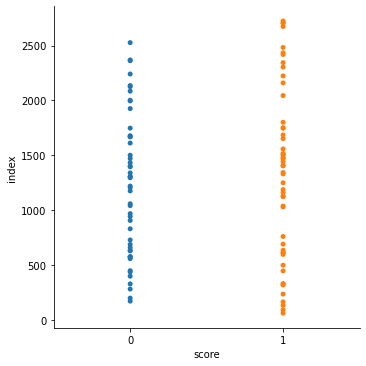

In [99]:
# use catplot() in seaborn to draw classification figure(0 or 1)
S = X
S['index'] = S.index
S_sample = S.sample(n=100)
sns.catplot(x='score',y='index',jitter=False,data=S_sample)

In [100]:
# 3D plot of PCA

import plotly.express as px
from sklearn.decomposition import PCA

pca = PCA(n_components = 3)
components = pca.fit_transform(X_counts.toarray())

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=X['score'],
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'},
)
fig.show()

## Generate TF-IDF features

In [101]:
from sklearn.feature_extraction.text import TfidfTransformer

In [102]:
import re
txts = [[],[],[]]
txt_name = []
i = 0
for filename in os.listdir(dir_path):
    if filename.endswith('.txt') and filename != 'readme.txt':
        txt_name.append(filename[:-4])
        with open(dir_path + '/' + filename,'r')as f:
            txts[i] = ''
            for line in f.readlines():
                line = re.match(r'(.*)\t(.*)\n',line)
                txts[i] += line.group(1) + ' '  # get the sentence content
            i += 1


In [103]:
vectorizer = CountVectorizer(stop_words=None, token_pattern="(?u)\\b\\w+\\b")
Y = vectorizer.fit_transform([txts[0],txts[1],txts[2]])

In [104]:
train_tfidf = TfidfTransformer(smooth_idf=True).fit_transform(Y)

In [105]:
pd.DataFrame(train_tfidf.toarray(),columns=vectorizer.get_feature_names(),index = txt_name)

,0,00,1,10,100,11,12,13,15,15g,...,yukon,yum,yummy,yun,z,z500a,zero,zillion,zombie,zombiez
amazon_cells_labelled,0.000000,0.000000,0.008406,0.003736,0.001203,0.001203,0.000934,0.001203,0.000934,0.001581,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.001581,0.001203,0.000000,0.000000,0.000000
yelp_labelled,0.000000,0.001542,0.006376,0.004554,0.002346,0.001173,0.001822,0.000000,0.000911,0.000000,...,0.001542,0.003084,0.006169,0.000000,0.000000,0.000000,0.005864,0.000000,0.000000,0.000000
imdb_labelled,0.002256,0.000000,0.004664,0.019322,0.000000,0.000000,0.000666,0.001716,0.000666,0.000000,...,0.000000,0.000000,0.000000,0.001128,0.001128,0.000000,0.000000,0.001128,0.002256,0.001128


## Naive Bayes classifier 

In [106]:
# show the every sentence's wordfreq and tfidf
X['wordfreq'] = list(X_counts.toarray())
tfidf = vectorizer.fit_transform(X['sentence']).toarray()
X['tfidf']=list(tfidf)
X

,sentence,score,filename,unigrams,bin_category,index,wordfreq,tfidf
0,So there is no way for me to plug it in here i...,0,amazon_cells_labelled,"[So, there, is, no, way, for, me, to, plug, it...","[1, 0, 0]",0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,"Good case, Excellent value.",1,amazon_cells_labelled,"[Good, case, ,, Excellent, value, .]","[1, 0, 0]",1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,Great for the jawbone.,1,amazon_cells_labelled,"[Great, for, the, jawbone, .]","[1, 0, 0]",2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,Tied to charger for conversations lasting more...,0,amazon_cells_labelled,"[Tied, to, charger, for, conversations, lastin...","[1, 0, 0]",3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,The mic is great.,1,amazon_cells_labelled,"[The, mic, is, great, .]","[1, 0, 0]",4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...,...
2743,I just got bored watching Jessice Lange take h...,0,imdb_labelled,"[I, just, got, bored, watching, Jessice, Lange...","[0, 1, 0]",2743,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2744,"Unfortunately, any virtue in this film's produ...",0,imdb_labelled,"[Unfortunately, ,, any, virtue, in, this, film...","[0, 1, 0]",2744,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2745,"In a word, it is embarrassing.",0,imdb_labelled,"[In, a, word, ,, it, is, embarrassing, .]","[0, 1, 0]",2745,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2746,Exceptionally bad!,0,imdb_labelled,"[Exceptionally, bad, !]","[0, 1, 0]",2746,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


### Naive Bayes classifier for word frequency

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing
model = GaussianNB()
x =X['wordfreq']
y = X['score']

le = preprocessing.LabelEncoder()
Y_class_label = le.fit_transform(y)
features = list(x)

model.fit(features, Y_class_label)
expected = Y_class_label
predicted = model.predict(features)
from sklearn import metrics
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           0       0.99      0.84      0.91      1348
           1       0.86      0.99      0.92      1366

    accuracy                           0.92      2714
   macro avg       0.93      0.92      0.92      2714
weighted avg       0.93      0.92      0.92      2714

[[1135  213]
 [  13 1353]]


### Naive Bayes classifier for TF-IDF

In [108]:
model = GaussianNB()
x = X['tfidf']
y = X['score']

le = preprocessing.LabelEncoder()
Y_class_label = le.fit_transform(y)
features = list(x)

model.fit(features, Y_class_label)
expected = Y_class_label
predicted = model.predict(features)
from sklearn import metrics
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           0       0.99      0.84      0.91      1348
           1       0.87      0.99      0.92      1366

    accuracy                           0.92      2714
   macro avg       0.93      0.92      0.92      2714
weighted avg       0.93      0.92      0.92      2714

[[1138  210]
 [  14 1352]]


## Not ideal or the most efficient/meaningful part

In [109]:
'''
Even though PCA is a widely used technique, its main disadvantage is the inability to maintain the local structure of the data set.
T-sne is a nonlinear dimensionality reduction algorithm, which is very suitable for visualization of high-dimensional data by dimensionality reduction to 2 or 3 dimensions.
'''

from sklearn.manifold import TSNE

X_tsne = TSNE(n_components=2, random_state=0).fit_transform(X_counts.toarray())

fig = px.scatter(X_tsne, x=0, y=1,color=X.score, labels={'color': 'score'})
fig.show()


In [110]:
# use TSNE to draw 3D picture
X_tsne = TSNE(n_components=3, random_state=0).fit_transform(X_counts.toarray())

fig = px.scatter_3d(X_tsne, x=0, y=1, z=2,color=X.score, labels={'color': 'score'})
fig.update_traces(marker_size=5)
fig.show()